In [3]:
mapping = {
    # ===== EQUITIES =====
    "RELIANCE": {
        "keyword": "Reliance Industries India",
        "symbol": "RELIANCE.NS"
    },
    "ITC": {
        "keyword": "ITC Limited India",
        "symbol": "ITC.NS"
    },
    "HDFCBANK": {
        "keyword": "HDFC Bank India",
        "symbol": "HDFCBANK.NS"
    },
    "LIC": {
        "keyword": "Life Insurance Corporation of India insurance sector",
        "symbol": "LICI.NS"
    },
    "TATASTEEL": {
        "keyword": "Tata Steel India steel sector metal stocks",
        "symbol": "TATASTEEL.NS"
    },
    "APOLLO": {
        "keyword": "Apollo Hospitals India healthcare hospital sector",
        "symbol": "APOLLOHOSP.NS"
    },
    "VBL": {
        "keyword": "Varun Beverages India FMCG beverage industry",
        "symbol": "VBL.NS"
    },
    # ===== COMMODITY / MACRO (if already present earlier) =====
    "GOLD": {
        "keyword": "precious metals market gold prices",
        "symbol": "GC=F"
    },
    "SILVER": {
        "keyword": "precious metals market silver prices",
        "symbol": "SI=F"
    },
    "COPPER": {
        "keyword": "base metals market copper prices",
        "symbol": "HG=F"
    },
    "CRUDEOIL": {
        "keyword": "crude oil prices global energy market",
        "symbol": "CL=F"
    }
}

## Data Collection

In [4]:
import yfinance as yf
import pandas as pd

In [5]:
def fetch_price(asset, start, end):

    symbol = mapping[asset]["symbol"]
   
    df = yf.download(
        symbol,
        start=start,
        end=end,
        auto_adjust=False
    )

    df.reset_index(inplace=True)
    df["asset"] = asset

    df["Date"] = pd.to_datetime(df["Date"])
    
    return df

In [6]:
re_df = fetch_price("RELIANCE","2021-01-01","2026-01-01")
re_df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume,asset
Ticker,,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,
0,2021-01-01,901.194641,917.230957,921.615173,914.692688,917.461670,10015175,RELIANCE
1,2021-01-04,902.713745,918.776978,922.492004,908.231689,920.738342,24513534,RELIANCE
2,2021-01-05,891.491211,907.354858,915.431091,902.693665,908.693176,24123091,RELIANCE
3,2021-01-06,867.980774,883.426086,907.308655,879.226440,907.262512,46401468,RELIANCE
4,2021-01-07,866.575073,881.995422,897.617188,879.226440,886.310425,32325918,RELIANCE


In [7]:
re_df.shape

(1236, 8)

In [8]:
re_df.dtypes

Price      Ticker     
Date                      datetime64[ns]
Adj Close  RELIANCE.NS           float64
Close      RELIANCE.NS           float64
High       RELIANCE.NS           float64
Low        RELIANCE.NS           float64
Open       RELIANCE.NS           float64
Volume     RELIANCE.NS             int64
asset                             object
dtype: object

In [9]:
def standardize_df(df):
    df = df.copy()

    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.droplevel(1)
        
    df.reset_index(inplace=True)
    if "index" in df.columns:
        df.drop(columns=["index"], inplace=True)

    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
    
    df.columns = df.columns.str.lower()
    df = df.sort_values("date").reset_index(drop=True)

    return df

In [10]:
re_df = standardize_df(re_df)
re_df.head()

Price,date,adj close,close,high,low,open,volume,asset
0,2021-01-01,901.194641,917.230957,921.615173,914.692688,917.461670,10015175,RELIANCE
1,2021-01-04,902.713745,918.776978,922.492004,908.231689,920.738342,24513534,RELIANCE
2,2021-01-05,891.491211,907.354858,915.431091,902.693665,908.693176,24123091,RELIANCE
3,2021-01-06,867.980774,883.426086,907.308655,879.226440,907.262512,46401468,RELIANCE
4,2021-01-07,866.575073,881.995422,897.617188,879.226440,886.310425,32325918,RELIANCE


In [11]:
def save(df, asset):
    df.to_csv(f"../data/raw/market/{asset}.csv")

In [12]:
for asset, keyword in mapping.items():
    df = fetch_price(asset, "2021-01-01", "2026-01-01")
    df = standardize_df(df)
    save(df, asset)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
def load(asset):
    df = pd.read_csv(f"../data/raw/market/{asset}.csv")
    #df["Date"] = pd.to_datetime(df["Date"])
    return df

## Feature Engineering

In [14]:
import numpy as np

In [15]:
def returns(df):
    df["close"] = pd.to_numeric(df["close"], errors="coerce")
    df["return"] = np.log(df["close"]/df["close"].shift(1))

In [16]:
returns(re_df)
re_df.head()

Price,date,adj close,close,high,low,open,volume,asset,return
0,2021-01-01,901.194641,917.230957,921.615173,914.692688,917.461670,10015175,RELIANCE,NaN
1,2021-01-04,902.713745,918.776978,922.492004,908.231689,920.738342,24513534,RELIANCE,0.001684
2,2021-01-05,891.491211,907.354858,915.431091,902.693665,908.693176,24123091,RELIANCE,-0.012510
3,2021-01-06,867.980774,883.426086,907.308655,879.226440,907.262512,46401468,RELIANCE,-0.026726
4,2021-01-07,866.575073,881.995422,897.617188,879.226440,886.310425,32325918,RELIANCE,-0.001621


In [17]:
# relative strength index
def rsi(df, window=14):
    series = df["close"]
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    
    rs = avg_gain/avg_loss
    rsi = 100 - (100 / (1+rs) )

    df["rsi"] = rsi
    df["rsi_sentiment"] = np.tanh((df["rsi"] - 60) / 10)

In [18]:
rsi(re_df)
re_df.value_counts()

date        adj close    close        high         low          open         volume    asset     return     rsi        rsi_sentiment
2025-12-31  1570.400024  1570.400024  1577.000000  1541.000000  1541.000000  5771830   RELIANCE   0.019678  62.398237   0.235329        1
2021-01-21  951.933533   968.872742   978.379639   957.612183   960.842651   39087742  RELIANCE   0.021522  63.103029   0.300713        1
2021-01-22  929.352722   945.890076   976.233704   939.221375   974.226135   30532660  RELIANCE  -0.024007  56.204452  -0.362321        1
2021-01-25  880.110046   895.771179   939.129089   891.617676   939.129089   54207104  RELIANCE  -0.054441  47.748065  -0.841179        1
2021-01-27  859.252197   874.542175   888.387207   871.311707   888.387207   42370131  RELIANCE  -0.023984  48.254594  -0.825722        1
                                                                                                                                       ..
2021-02-04  872.537781   888.064148   8

In [19]:
# exponential moving average
def ema(df):
    
    df["ema_5"] = df["close"].ewm(span=5, adjust=False).mean()
    df["ema_13"] = df["close"].ewm(span=13, adjust=False).mean()
    
    df["ema_diff"] = (df["ema_5"] - df["ema_13"]) / df["ema_13"]
    df["ema_sentiment"] = (df["ema_diff"] - df["ema_diff"].mean()) / df["ema_diff"].std()

In [20]:
ema(re_df)
re_df.sample(10)

Price,date,adj close,close,high,low,open,volume,asset,return,rsi,rsi_sentiment,ema_5,ema_13,ema_diff,ema_sentiment
700,2023-10-31,1135.545288,1143.949951,1164.000000,1141.449951,1164.000000,12808438,RELIANCE,-0.010695,46.547658,-0.872924,1141.805725,1148.070983,-0.005457,-0.550837
11,2021-01-18,899.584961,915.592590,921.615173,887.625732,899.509338,35100458,RELIANCE,0.023717,NaN,NaN,902.809076,902.177449,0.000700,-0.070235
256,2022-01-13,1153.591919,1170.040527,1172.671143,1157.626221,1163.556519,11856712,RELIANCE,0.005617,72.531849,0.849174,1148.954388,1129.832318,0.016925,1.196155
674,2023-09-21,1173.712891,1182.400024,1195.050049,1180.000000,1187.474976,12226182,RELIANCE,-0.007310,40.378490,-0.961254,1202.539995,1214.303206,-0.009687,-0.881006
1156,2025-09-05,1375.000000,1375.000000,1381.000000,1359.300049,1363.000000,5777575,RELIANCE,0.011484,50.311514,-0.748198,1370.023006,1378.852130,-0.006403,-0.624679
976,2024-12-16,1263.254761,1268.300049,1281.000000,1266.550049,1275.000000,9486781,RELIANCE,-0.003581,42.324957,-0.943335,1275.477406,1284.605421,-0.007106,-0.679509
901,2024-08-28,1492.339844,1498.300049,1507.474976,1493.000000,1505.000000,9610286,RELIANCE,-0.001434,63.339339,0.322051,1499.649213,1493.699369,0.003983,0.186029
592,2023-05-25,1113.828979,1126.036499,1130.213135,1115.006714,1123.244507,11487863,RELIANCE,-0.000123,49.474612,-0.782791,1128.544680,1128.864244,-0.000283,-0.146978
814,2024-04-22,1468.977417,1479.849976,1482.824951,1467.800049,1472.449951,10350362,RELIANCE,0.006593,47.634999,-0.844454,1471.894554,1469.797815,0.001427,-0.013534
84,2021-05-07,875.915894,891.502319,902.532166,888.848694,894.271301,12288548,RELIANCE,0.000388,49.937633,-0.764201,894.085053,899.405052,-0.005915,-0.586572


In [21]:
# volume
def vol(df):
    
    df["volume_mean"] = df["volume"].rolling(20).mean()
    df["volume_std"] = df["volume"].rolling(20).std()

    df["volume_z"] = (df["volume"] - df["volume_mean"])/df["volume_std"]

    df["volume_sent"] = df["volume_z"].clip(-3,3) / 3
    df["volume_price_pressure"] = df["return"] * df["volume_sent"]

In [22]:
vol(re_df)
re_df.sample(8)

Price,date,adj close,close,high,low,open,volume,asset,return,rsi,rsi_sentiment,ema_5,ema_13,ema_diff,ema_sentiment,volume_mean,volume_std,volume_z,volume_sent,volume_price_pressure
71,2021-04-19,862.290283,877.634216,884.418274,872.234680,878.695679,18478808,RELIANCE,-0.015859,35.586953,-0.984960,891.068587,907.732516,-0.018358,-1.557774,19128944.35,6.178369e+06,-0.105228,-0.035076,0.000556
1003,2025-01-23,1258.623169,1263.650024,1277.349976,1261.599976,1270.000000,8720682,RELIANCE,-0.010587,52.806467,-0.616509,1273.328293,1264.867043,0.006689,0.397254,12589692.35,5.347600e+06,-0.723504,-0.241168,0.002553
708,2023-11-10,1148.946045,1157.449951,1158.175049,1149.025024,1152.775024,7734954,RELIANCE,0.001881,52.702671,-0.622902,1159.156904,1156.766438,0.002067,0.036417,10371187.30,2.883146e+06,-0.914360,-0.304787,-0.000573
980,2024-12-20,1200.505371,1205.300049,1239.500000,1201.500000,1224.000000,20312896,RELIANCE,-0.020651,23.255225,-0.998714,1235.805424,1259.817842,-0.019060,-1.612606,15775210.65,5.760423e+06,0.787735,0.262578,-0.005423
853,2024-06-19,1447.933228,1458.650024,1487.500000,1456.000000,1487.500000,8725874,RELIANCE,-0.015223,52.553390,-0.631953,1466.908354,1460.021591,0.004717,0.243289,13729030.40,8.217582e+06,-0.608836,-0.202945,0.003089
831,2024-05-16,1414.877808,1425.349976,1427.500000,1398.025024,1418.550049,14711774,RELIANCE,0.006387,40.228590,-0.962376,1417.768472,1425.058639,-0.005116,-0.524181,11712719.70,3.844178e+06,0.780155,0.260052,0.001661
386,2022-07-22,1138.940674,1155.180298,1161.272095,1151.442139,1153.749634,10969995,RELIANCE,0.006734,64.617411,0.431502,1141.850574,1133.689939,0.007198,0.436972,21378246.60,1.590618e+07,-0.654353,-0.218118,-0.001469
76,2021-04-27,901.716125,917.761658,921.707458,894.502075,895.309692,19992524,RELIANCE,0.025877,49.322348,-0.788618,896.865257,899.638892,-0.003083,-0.365526,17584515.10,3.520734e+06,0.683951,0.227984,0.005900


In [23]:
# vix - volatility index
def vix(df):
    df = df.copy()
    df["date"] = pd.to_datetime(df["date"])
    
    df["asset_volatility"] = df["return"].rolling(20).std()
    df["asset_vol_sentiment"] = -(df["asset_volatility"] - df["asset_volatility"].mean()) / df["asset_volatility"].std()

    nifty = yf.download("^NSEI", start="2021-01-01", end="2026-02-01", progress=False, auto_adjust=True)
    if isinstance(nifty.columns, pd.MultiIndex):
        nifty.columns = nifty.columns.droplevel(1)
    
    nifty = nifty.reset_index()
    nifty.columns = nifty.columns.str.lower()
    nifty.rename(columns={"date": "date"}, inplace=True)
    nifty["date"] = pd.to_datetime(nifty["date"])

    nifty["close"] = pd.to_numeric(nifty["close"], errors="coerce")
    nifty["return"] = np.log(nifty["close"]/nifty["close"].shift(1))
    nifty["market_volatility"] = nifty["return"].rolling(20).std()

    nifty["market_vol_sentiment"] = -(nifty["market_volatility"] - nifty["market_volatility"].mean())/nifty["market_volatility"].std()
    nifty = nifty[["date", "market_volatility", "market_vol_sentiment"]]

    df = df.merge(
        nifty,
        on="date",
        how="left"
    )

    df["market_volatility"] = df["market_volatility"].ffill()
    df["market_vol_sentiment"] = df["market_vol_sentiment"].ffill()

    return df

In [24]:
re_df = vix(re_df)
re_df.shape

(1236, 24)

In [25]:
cols = [
    "return", "rsi", "ema_5", "ema_13", "volume_sent",
    "asset_volatility", "asset_vol_sentiment", "market_vol_sentiment"
]

In [26]:
def drop_initial_nans(df, cols):
    df = df.copy()
    valid_mask = df[cols].notna().all(axis=1)

    if not valid_mask.any():
        raise ValueError("No row has all required columns non-NaN")

    # first index where everything becomes valid
    start_idx = valid_mask.idxmax()
    df = df.loc[start_idx:].reset_index(drop=True)
    
    return df

In [27]:
re_df = drop_initial_nans(re_df, cols)
re_df.head()

Price,date,adj close,close,high,low,open,volume,asset,return,rsi,...,ema_sentiment,volume_mean,volume_std,volume_z,volume_sent,volume_price_pressure,asset_volatility,asset_vol_sentiment,market_volatility,market_vol_sentiment
0,2021-02-01,859.388306,874.680664,879.157166,852.851685,858.112793,34180952,RELIANCE,0.028552,49.836345,...,-1.616001,33716496.65,8.737316e+06,0.053158,0.017719,0.000506,0.022473,-2.019358,0.014784,-1.967368
1,2021-02-02,873.217896,888.756409,895.309692,856.059143,883.426086,41470034,RELIANCE,0.015964,47.241592,...,-1.226768,34564321.65,8.619194e+06,0.801202,0.267067,0.004264,0.022833,-2.101735,0.015699,-2.239754
2,2021-02-03,875.417175,890.994690,900.847656,876.849670,889.910156,30301696,RELIANCE,0.002515,49.263188,...,-0.914205,34873251.90,8.331177e+06,-0.548729,-0.182910,-0.000460,0.022704,-2.072212,0.015786,-2.265717
3,2021-02-04,872.537781,888.064148,895.309692,879.157166,887.925659,25626981,RELIANCE,-0.003294,46.623884,...,-0.746998,33834527.55,8.110346e+06,-1.011985,-0.337328,0.001111,0.021892,-1.886205,0.015763,-2.258940
4,2021-02-05,872.288391,887.810303,897.455688,886.079712,890.717773,20248046,RELIANCE,-0.000286,48.669898,...,-0.626053,33230633.95,8.659644e+06,-1.499206,-0.499735,0.000143,0.021888,-1.885288,0.015746,-2.253871


In [28]:
re_df.shape

(1216, 24)

In [29]:
re_df[cols].isna().sum()

Price
return                  0
rsi                     0
ema_5                   0
ema_13                  0
volume_sent             0
asset_volatility        0
asset_vol_sentiment     0
market_vol_sentiment    0
dtype: int64

In [30]:
# next day price 

def forward_return(df):
    df["future_return"] = df["close"].shift(-1)/df["close"] - 1

In [31]:
forward_return(re_df)

## Processed Data

In [32]:
for asset, key in mapping.items():

    df = pd.read_csv(f"../data/raw/market/{asset}.csv")

    returns(df)
    rsi(df)
    ema(df)
    forward_return(df)

    vol(df)
    df = vix(df)

    df = drop_initial_nans(df, cols)

    df.to_csv(f"../data/processed/{asset}.csv")

## Lag Analysis

In [33]:
features = [
    "rsi",
    "rsi_sentiment",
    "ema_diff",
    "ema_sentiment",
    "volume_sent",
    "volume_price_pressure",
    "asset_vol_sentiment",
    "market_vol_sentiment"
]

max_lag, min_samples = 5, 30

In [34]:
re_df['date'].dtype

dtype('<M8[ns]')

In [35]:
def future_returns(df, max_lag):
    df = df.copy()

    for lag in range(1, max_lag+1):
        df[f"return_t+{lag}"] = df["return"].shift(-lag)

    return df

In [36]:
# for 5 day horizon
df = future_returns(re_df, 5)
df.head(10)

Price,date,adj close,close,high,low,open,volume,asset,return,rsi,...,asset_volatility,asset_vol_sentiment,market_volatility,market_vol_sentiment,future_return,return_t+1,return_t+2,return_t+3,return_t+4,return_t+5
0,2021-02-01,859.388306,874.680664,879.157166,852.851685,858.112793,34180952,RELIANCE,0.028552,49.836345,...,0.022473,-2.019358,0.014784,-1.967368,0.016092,0.015964,0.002515,-0.003294,-0.000286,0.014296
1,2021-02-02,873.217896,888.756409,895.309692,856.059143,883.426086,41470034,RELIANCE,0.015964,47.241592,...,0.022833,-2.101735,0.015699,-2.239754,0.002518,0.002515,-0.003294,-0.000286,0.014296,0.002406
2,2021-02-03,875.417175,890.994690,900.847656,876.849670,889.910156,30301696,RELIANCE,0.002515,49.263188,...,0.022704,-2.072212,0.015786,-2.265717,-0.003289,-0.003294,-0.000286,0.014296,0.002406,0.009236
3,2021-02-04,872.537781,888.064148,895.309692,879.157166,887.925659,25626981,RELIANCE,-0.003294,46.623884,...,0.021892,-1.886205,0.015763,-2.258940,-0.000286,-0.000286,0.014296,0.002406,0.009236,0.040403
4,2021-02-05,872.288391,887.810303,897.455688,886.079712,890.717773,20248046,RELIANCE,-0.000286,48.669898,...,0.021888,-1.885288,0.015746,-2.253871,0.014399,0.014296,0.002406,0.009236,0.040403,-0.006883
5,2021-02-08,884.848389,900.593872,908.693176,890.256287,892.102234,21183400,RELIANCE,0.014296,46.725117,...,0.021965,-1.903090,0.015672,-2.231913,0.002408,0.002406,0.009236,0.040403,-0.006883,-0.004418
6,2021-02-09,886.979553,902.762878,918.200073,900.986145,905.439636,19604141,RELIANCE,0.002406,43.569204,...,0.021482,-1.792432,0.015599,-2.209989,0.009278,0.009236,0.040403,-0.006883,-0.004418,0.013147
7,2021-02-10,895.209290,911.139099,915.961792,889.448608,901.655334,21234156,RELIANCE,0.009236,41.032784,...,0.020434,-1.552377,0.015587,-2.206349,0.041230,0.040403,-0.006883,-0.004418,0.013147,0.011466
8,2021-02-11,932.118652,948.705200,952.627991,910.193054,913.769653,42539278,RELIANCE,0.040403,45.494846,...,0.022136,-1.942249,0.015591,-2.207720,-0.006859,-0.006883,-0.004418,0.013147,0.011466,-0.007492
9,2021-02-12,925.725220,942.198059,958.996643,930.106750,948.612915,30497029,RELIANCE,-0.006883,49.109722,...,0.022150,-1.945458,0.015603,-2.211203,-0.004408,-0.004418,0.013147,0.011466,-0.007492,0.006075


In [37]:
# lag correlation
def lag_corr(df, max_lag, min_samples):
    results = []

    for feature in features:
        for lag in range(1, max_lag+1):
            cols = [feature, f"return_t+{lag}"]
            tmp = df[cols].dropna()

        if len(tmp) >= min_samples:
            corr = tmp.corr().iloc[0, 1]
        else:
            corr = None

        results.append({
            "feature" : feature,
            "lag" : lag,
            "correlation" : corr
        })

    return pd.DataFrame(results)

In [38]:
corr_cf = lag_corr(df, max_lag, min_samples)
corr_cf

,feature,lag,correlation
0,rsi,5,-0.014752
1,rsi_sentiment,5,-0.014204
2,ema_diff,5,-0.016603
3,ema_sentiment,5,-0.016603
4,volume_sent,5,-0.051134
5,volume_price_pressure,5,0.006608
6,asset_vol_sentiment,5,-0.011277
7,market_vol_sentiment,5,-0.037216


In [39]:
# diectional lag

def lag_dir(df, features, max_lag, min_samples):
    results = []

    for lag in range(1, max_lag+1):
        df[f"directional_t+{lag}"] = (df[f"return_t+{lag}"] > 0).astype(int)

    for feature in features:
        for lag in range(1, max_lag+1):
            cols = [feature, f"directional_t+{lag}"]
            tmp = df[cols].dropna()

            if len(tmp) >= min_samples:
                pred = (tmp[feature] > tmp[feature].median()).astype(int)
                acc = (pred == tmp[f"directional_t+{lag}"]).mean()
            else:
                acc = None

            results.append({
                "feature" : feature,
                "lag" : lag,
                "directional accuracy " : acc
            })

    return pd.DataFrame(results)

In [40]:
dir_cf = lag_dir(df, features, max_lag, min_samples)
dir_cf

,feature,lag,directional accuracy
0,rsi,1,0.493421
1,rsi,2,0.495888
2,rsi,3,0.483553
3,rsi,4,0.486842
4,rsi,5,0.498355
5,rsi_sentiment,1,0.493421
6,rsi_sentiment,2,0.495888
7,rsi_sentiment,3,0.483553
8,rsi_sentiment,4,0.486842
9,rsi_sentiment,5,0.498355


In [41]:
df

Price,date,adj close,close,high,low,open,volume,asset,return,rsi,...,return_t+1,return_t+2,return_t+3,return_t+4,return_t+5,directional_t+1,directional_t+2,directional_t+3,directional_t+4,directional_t+5
0,2021-02-01,859.388306,874.680664,879.157166,852.851685,858.112793,34180952,RELIANCE,0.028552,49.836345,...,0.015964,0.002515,-0.003294,-0.000286,0.014296,1,1,0,0,1
1,2021-02-02,873.217896,888.756409,895.309692,856.059143,883.426086,41470034,RELIANCE,0.015964,47.241592,...,0.002515,-0.003294,-0.000286,0.014296,0.002406,1,0,0,1,1
2,2021-02-03,875.417175,890.994690,900.847656,876.849670,889.910156,30301696,RELIANCE,0.002515,49.263188,...,-0.003294,-0.000286,0.014296,0.002406,0.009236,0,0,1,1,1
3,2021-02-04,872.537781,888.064148,895.309692,879.157166,887.925659,25626981,RELIANCE,-0.003294,46.623884,...,-0.000286,0.014296,0.002406,0.009236,0.040403,0,1,1,1,1
4,2021-02-05,872.288391,887.810303,897.455688,886.079712,890.717773,20248046,RELIANCE,-0.000286,48.669898,...,0.014296,0.002406,0.009236,0.040403,-0.006883,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,2025-12-24,1558.199951,1558.199951,1575.699951,1553.599976,1572.699951,8815745,RELIANCE,-0.007990,60.035515,...,0.000642,-0.008761,-0.003760,0.019678,NaN,1,0,0,1,0
1212,2025-12-26,1559.199951,1559.199951,1561.000000,1554.300049,1554.699951,2311495,RELIANCE,0.000642,58.563527,...,-0.008761,-0.003760,0.019678,NaN,NaN,0,0,1,0,0
1213,2025-12-29,1545.599976,1545.599976,1558.099976,1543.599976,1554.900024,5972105,RELIANCE,-0.008761,51.085132,...,-0.003760,0.019678,NaN,NaN,NaN,0,1,0,0,0
1214,2025-12-30,1539.800049,1539.800049,1553.599976,1537.800049,1547.000000,8815884,RELIANCE,-0.003760,54.642873,...,0.019678,NaN,NaN,NaN,NaN,1,0,0,0,0


In [42]:
def best_lag(dir_cf):
    return(
        dir_cf
        .dropna()
        .assign(abs_corr=lambda x : x["correlation"].abs())
        .sort_values("abs_corr", ascending=False)
        .groupby("feature")
        .first()
        .reset_index()
        [["feature", "lag", "correlation"]]
    )

In [43]:
best_df = best_lag(corr_cf)
best_df

,feature,lag,correlation
0,asset_vol_sentiment,5,-0.011277
1,ema_diff,5,-0.016603
2,ema_sentiment,5,-0.016603
3,market_vol_sentiment,5,-0.037216
4,rsi,5,-0.014752
5,rsi_sentiment,5,-0.014204
6,volume_price_pressure,5,0.006608
7,volume_sent,5,-0.051134


In [44]:
def lag_corr_cruve(df, features, max_lag):
    results = []

    for feature in features:
        for lag in range(1, max_lag+1):
            cols = [feature, f"return_t+{lag}"]
            tmp = df[cols].dropna()

            corr = tmp.corr().iloc[0, 1] if len(tmp) > 1 else None

            results.append({
                "feature": feature,
                "lag": lag,
                "correlation": corr,
                "samples": len(tmp)
            })

    return pd.DataFrame(results)

In [45]:
corr_curve_df = lag_corr_cruve(df, features, max_lag)
corr_curve_df

,feature,lag,correlation,samples
0,rsi,1,-0.015089,1215
1,rsi,2,-0.023669,1214
2,rsi,3,-0.024261,1213
3,rsi,4,-0.003604,1212
4,rsi,5,-0.014752,1211
5,rsi_sentiment,1,0.008700,1215
6,rsi_sentiment,2,-0.005541,1214
7,rsi_sentiment,3,-0.015190,1213
8,rsi_sentiment,4,0.004243,1212
9,rsi_sentiment,5,-0.014204,1211


## Plots

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

### Lag Correlation

In [47]:
def lag_curve(lag_df, feature):
    data = lag_df[lag_df["feature"] == feature]

    plt.figure(figsize=(6,4))
    plt.plot(data["lag"], data["correlation"], marker='o')
    #plt.axhline(0, linestlye="--")
    plt.title(f"Lag Correlation — {feature}")
    plt.xlabel("Lag")
    plt.ylabel("Correlation")
    plt.grid(True)
    plt.show()

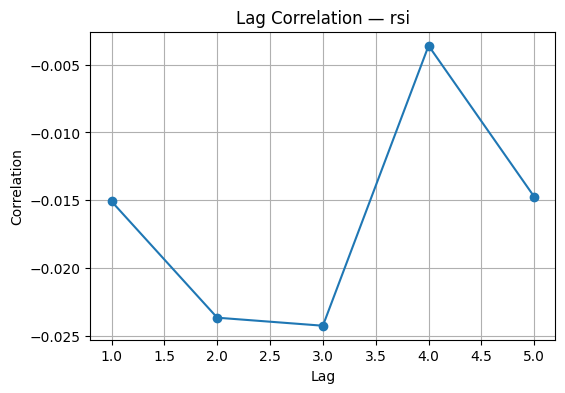

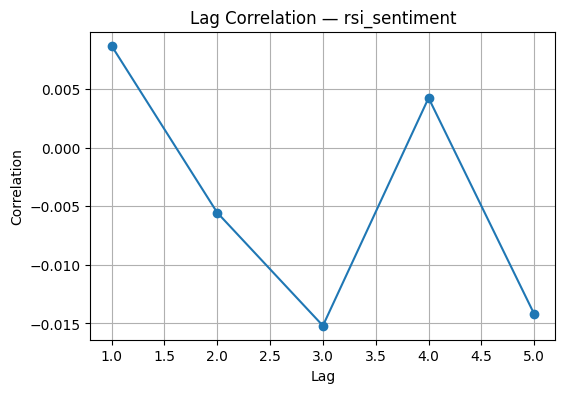

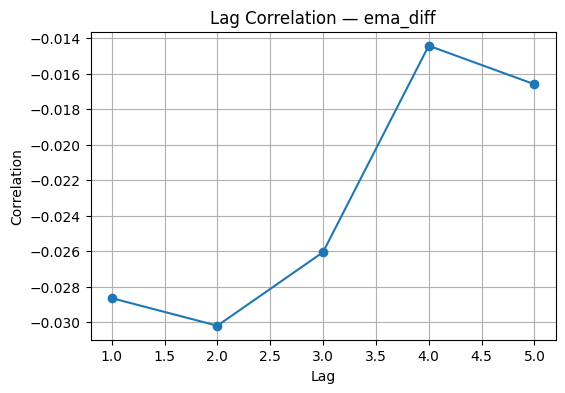

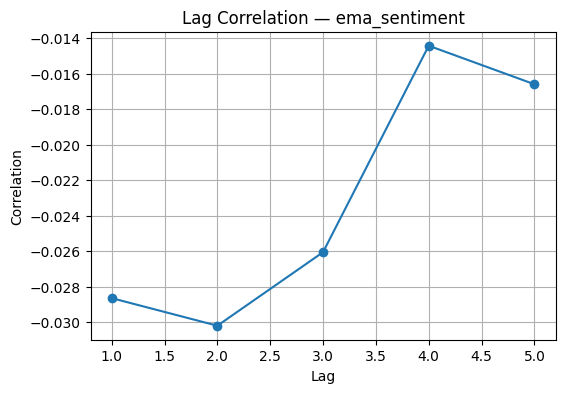

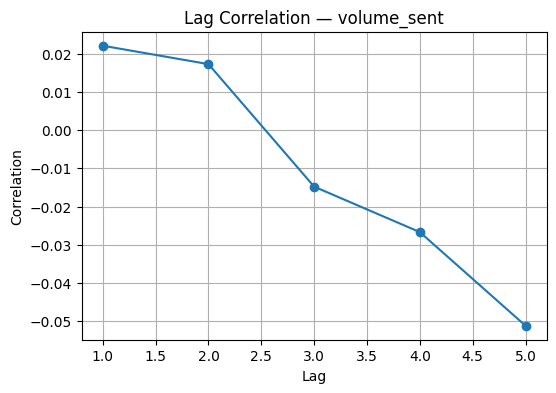

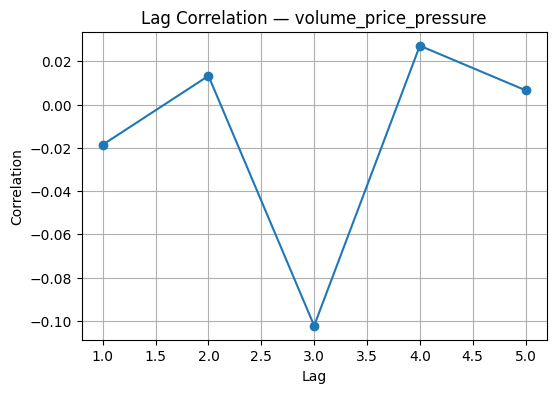

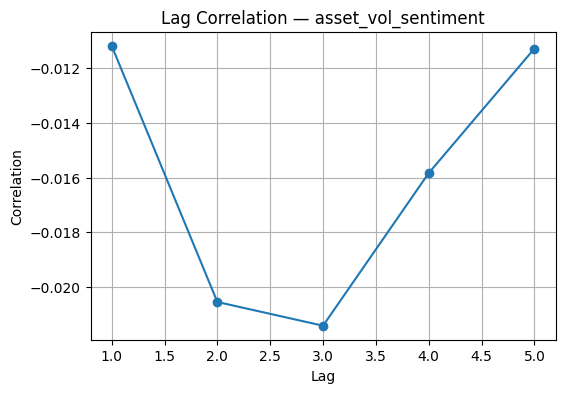

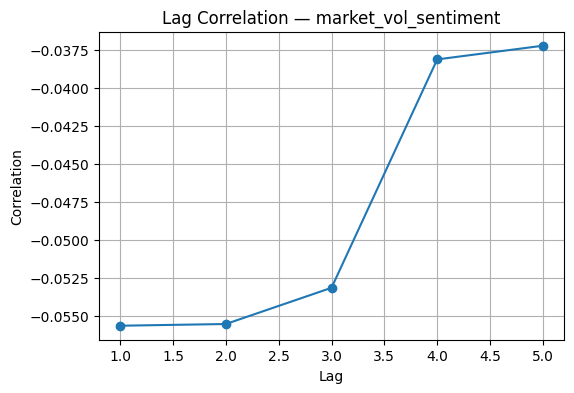

In [48]:
for feature in features:
    lag_curve(corr_curve_df, feature)

In [49]:
def lag_analysis(df, asset, max_lag, min_samples, features, plot=False):
    df = df.copy()

    df = future_returns(df, max_lag)

    corr_df = lag_corr(df, max_lag, min_samples)
    dir_df = lag_dir(df, features, max_lag, min_samples)
    
    best_lag_df = best_lag(corr_df)
    best_lag_df["asset"] = asset

    if plot:
        for f in features:
            plot_lag_curve(corr_df, f)

    return {
        "asset": asset,
        "correlation_table": corr_df,
        "directional_table": dir_df,
        "best_lags": best_lag_df
    }

In [50]:
lag_analysis(df, "RELIANCE", max_lag, min_samples, features, plot=False)

{'asset': 'RELIANCE',
 'correlation_table':                  feature  lag  correlation
 0                    rsi    5    -0.014752
 1          rsi_sentiment    5    -0.014204
 2               ema_diff    5    -0.016603
 3          ema_sentiment    5    -0.016603
 4            volume_sent    5    -0.051134
 5  volume_price_pressure    5     0.006608
 6    asset_vol_sentiment    5    -0.011277
 7   market_vol_sentiment    5    -0.037216,
 'directional_table':                   feature  lag  directional accuracy 
 0                     rsi    1               0.493421
 1                     rsi    2               0.495888
 2                     rsi    3               0.483553
 3                     rsi    4               0.486842
 4                     rsi    5               0.498355
 5           rsi_sentiment    1               0.493421
 6           rsi_sentiment    2               0.495888
 7           rsi_sentiment    3               0.483553
 8           rsi_sentiment    4             

In [51]:
all_assets = []

for asset, key in mapping.items():
    df = pd.read_csv(f"../data/processed/{asset}.csv")
    
    out = lag_analysis(df, asset, max_lag, min_samples, features, plot=False)
    all_assets.append(out["best_lags"])

table = pd.concat(all_assets, ignore_index=True)
table

,feature,lag,correlation,asset
0,asset_vol_sentiment,5,-0.011277,RELIANCE
1,ema_diff,5,-0.016603,RELIANCE
2,ema_sentiment,5,-0.016603,RELIANCE
3,market_vol_sentiment,5,-0.037216,RELIANCE
4,rsi,5,-0.014752,RELIANCE
...,...,...,...,...
83,market_vol_sentiment,5,-0.040438,CRUDEOIL
84,rsi,5,-0.012798,CRUDEOIL
85,rsi_sentiment,5,-0.011747,CRUDEOIL
86,volume_price_pressure,5,-0.007217,CRUDEOIL


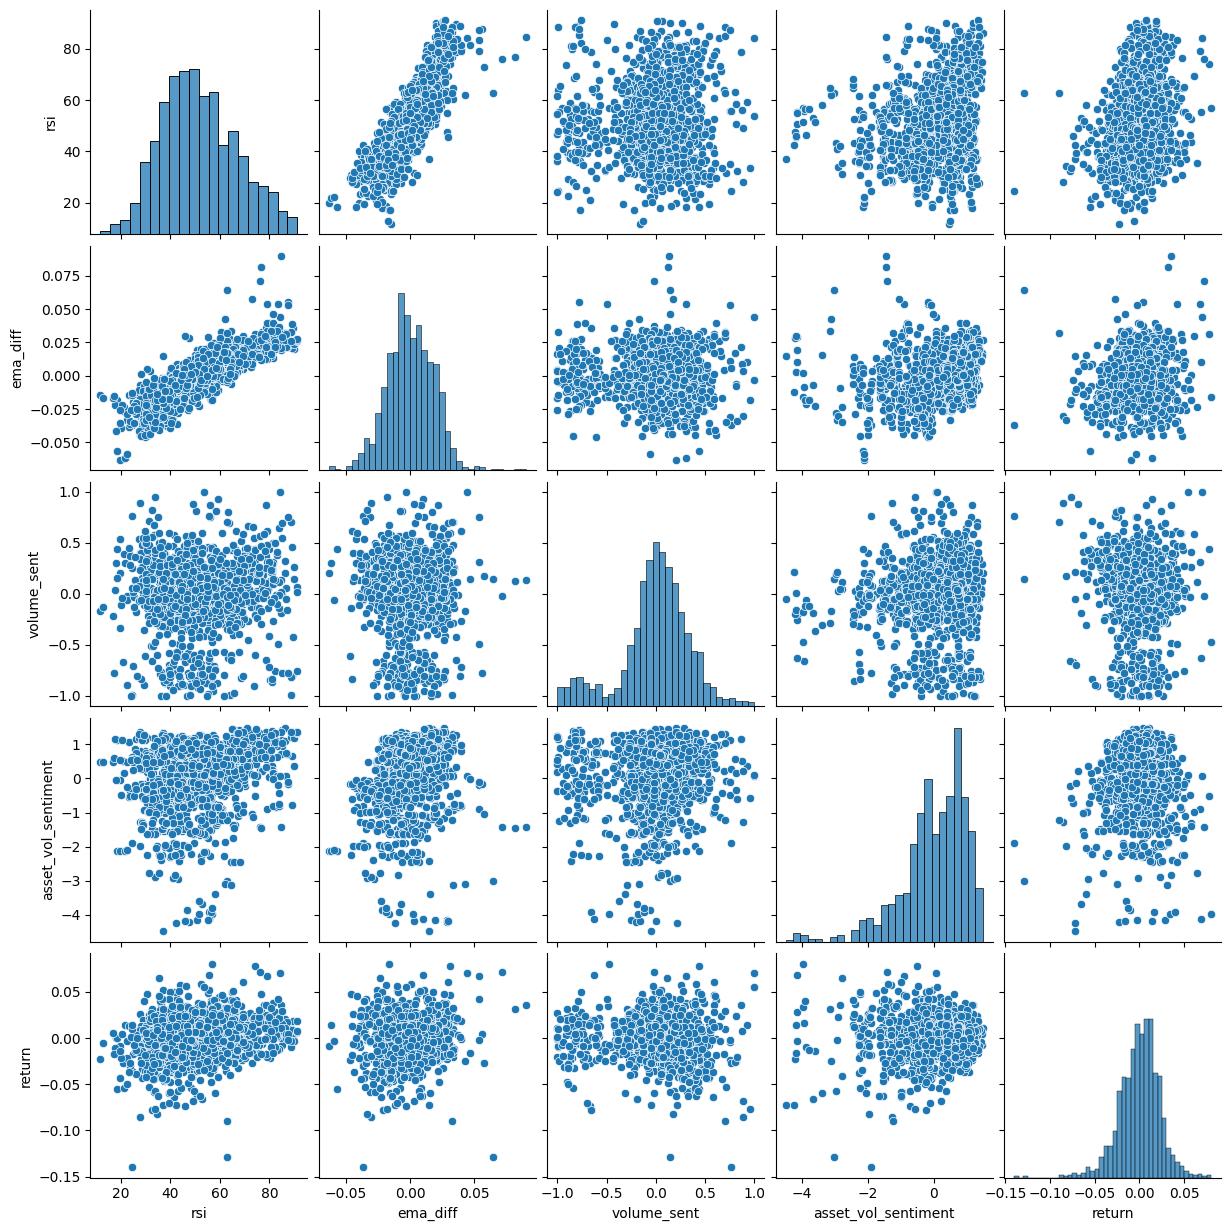

In [52]:
sns.pairplot(
    df[[
        "rsi",
        "ema_diff",
        "volume_sent",
        "asset_vol_sentiment",
        "return"
    ]].dropna()
)

In [53]:
# HeatMap -> Feature v/s Lag

def lag_heatmap(corr_curve_df):
    pivot = corr_curve_df.pivot(
        index="feature",
        columns="lag",
        values="correlation"
    )

    plt.figure(figsize=(8,4))
    sns.heatmap(
        pivot,
        annot=True,
        cmap="coolwarm",
        center=0,
        fmt=".3f"
    )

    plt.title("Lag Correlation Heatmap")
    plt.show()

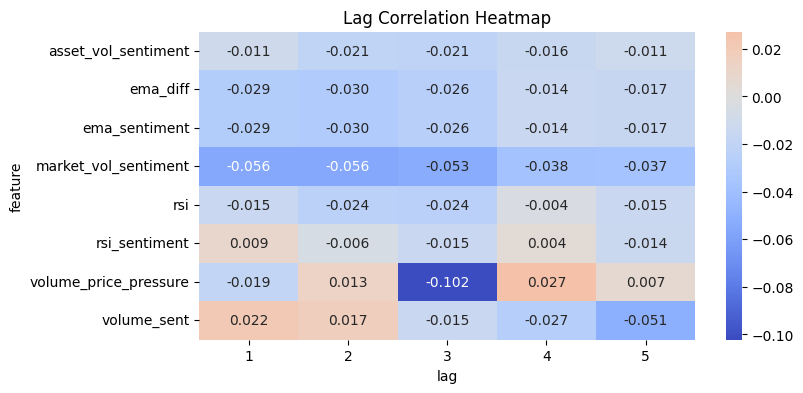

In [54]:
lag_heatmap(corr_curve_df)

In [55]:
# HeatMap -> Feature v/s Feature

def feature_corr(df, features):
    corr = df[features].corr()

    plt.figure(figsize=(6,5))
    sns.heatmap(
        corr,
        cmap="coolwarm",
        center=0,
        annot=True,
        fmt=".2f"
    )

    plt.title("Feature Correlation Heatmap")
    plt.show()

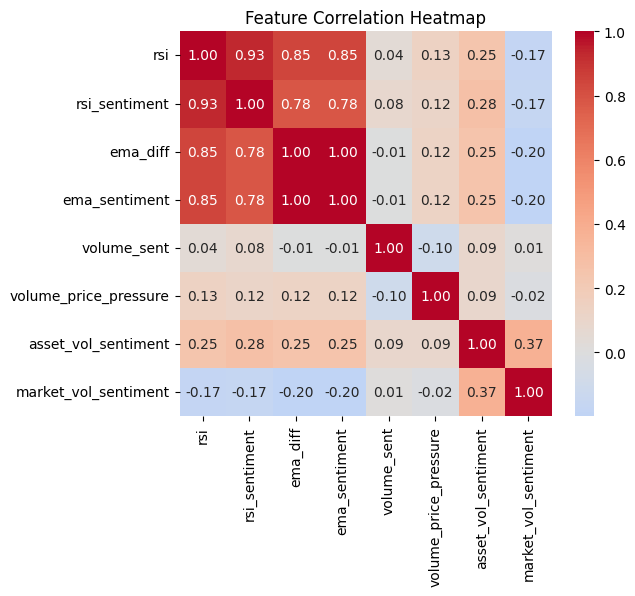

In [56]:
feature_corr(df, features)

## Modelling

In [57]:
EQUITIES = ['RELIANCE', 'ITC', 'HDFCBANK', 'LIC', 'TATASTEEL', 'APOLLO', 'VBL']
COMMODITIES = ['GOLD', 'SILVER', 'COPPER', 'CRUDEOIL']

def load_processed(asset):
    df = pd.read_csv(f"../data/processed/{asset}.csv")
    return df

In [58]:
df_r = load_processed('RELIANCE')
df_i = load_processed('ITC')
df_h = load_processed('HDFCBANK')
df_l = load_processed('LIC')
df_t = load_processed('TATASTEEL')
df_a = load_processed('APOLLO')
df_v = load_processed('VBL')

df_equities = pd.concat([
    df_r, df_i, df_h, df_l, df_t, df_a, df_v
])


df_g = load_processed('GOLD')
df_s = load_processed('SILVER')
df_co = load_processed('COPPER')
df_cu = load_processed('CRUDEOIL')

df_commodities = pd.concat([
    df_g, df_s, df_co, df_cu
])

In [59]:
df_equities

,Unnamed: 0.1,Unnamed: 0,date,adj close,close,high,low,open,volume,asset,...,future_return,volume_mean,volume_std,volume_z,volume_sent,volume_price_pressure,asset_volatility,asset_vol_sentiment,market_volatility,market_vol_sentiment
0,0,20,2021-02-01,859.388306,874.680664,879.157166,852.851685,858.112793,34180952,RELIANCE,...,0.016092,33716496.65,8.737316e+06,0.053158,0.017719,0.000506,0.022473,-2.019358,0.014784,-1.967368
1,1,21,2021-02-02,873.217896,888.756409,895.309692,856.059143,883.426086,41470034,RELIANCE,...,0.002518,34564321.65,8.619194e+06,0.801202,0.267067,0.004264,0.022833,-2.101735,0.015699,-2.239754
2,2,22,2021-02-03,875.417175,890.994690,900.847656,876.849670,889.910156,30301696,RELIANCE,...,-0.003289,34873251.90,8.331177e+06,-0.548729,-0.182910,-0.000460,0.022704,-2.072212,0.015786,-2.265717
3,3,23,2021-02-04,872.537781,888.064148,895.309692,879.157166,887.925659,25626981,RELIANCE,...,-0.000286,33834527.55,8.110346e+06,-1.011985,-0.337328,0.001111,0.021892,-1.886205,0.015763,-2.258940
4,4,24,2021-02-05,872.288391,887.810303,897.455688,886.079712,890.717773,20248046,RELIANCE,...,0.014399,33230633.95,8.659644e+06,-1.499206,-0.499735,0.000143,0.021888,-1.885288,0.015746,-2.253871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,1211,1231,2025-12-24,477.649994,477.649994,482.000000,472.500000,481.500000,3268207,VBL,...,0.010887,4260297.75,2.856409e+06,-0.347321,-0.115774,0.000990,0.013124,1.453065,0.004497,1.096285
1212,1212,1232,2025-12-26,482.850006,482.850006,483.500000,475.100006,476.000000,5793445,VBL,...,-0.000311,4430306.90,2.840581e+06,0.479880,0.159960,0.001732,0.013288,1.424016,0.004570,1.074554
1213,1213,1233,2025-12-29,482.700012,482.700012,494.350006,481.450012,483.899994,5900713,VBL,...,0.003625,4074671.95,2.042598e+06,0.893980,0.297993,-0.000093,0.011484,1.744811,0.004637,1.054425
1214,1214,1234,2025-12-30,484.450012,484.450012,487.000000,480.200012,483.000000,5238532,VBL,...,0.011147,4176002.30,2.047808e+06,0.518862,0.172954,0.000626,0.011448,1.751192,0.004636,1.054748


In [60]:
def label(x, threshold=0.02):
    if x > threshold:
        return 1
    elif x < threshold:
        return -1
    else:
        return 0

In [61]:
df_equities["target"] = df_equities["future_return"].apply(label)
df_equities = df_equities.dropna()
df_equities.head()

,Unnamed: 0.1,Unnamed: 0,date,adj close,close,high,low,open,volume,asset,...,volume_mean,volume_std,volume_z,volume_sent,volume_price_pressure,asset_volatility,asset_vol_sentiment,market_volatility,market_vol_sentiment,target
0,0,20,2021-02-01,859.388306,874.680664,879.157166,852.851685,858.112793,34180952,RELIANCE,...,33716496.65,8.737316e+06,0.053158,0.017719,0.000506,0.022473,-2.019358,0.014784,-1.967368,-1
1,1,21,2021-02-02,873.217896,888.756409,895.309692,856.059143,883.426086,41470034,RELIANCE,...,34564321.65,8.619194e+06,0.801202,0.267067,0.004264,0.022833,-2.101735,0.015699,-2.239754,-1
2,2,22,2021-02-03,875.417175,890.994690,900.847656,876.849670,889.910156,30301696,RELIANCE,...,34873251.90,8.331177e+06,-0.548729,-0.182910,-0.000460,0.022704,-2.072212,0.015786,-2.265717,-1
3,3,23,2021-02-04,872.537781,888.064148,895.309692,879.157166,887.925659,25626981,RELIANCE,...,33834527.55,8.110346e+06,-1.011985,-0.337328,0.001111,0.021892,-1.886205,0.015763,-2.258940,-1
4,4,24,2021-02-05,872.288391,887.810303,897.455688,886.079712,890.717773,20248046,RELIANCE,...,33230633.95,8.659644e+06,-1.499206,-0.499735,0.000143,0.021888,-1.885288,0.015746,-2.253871,-1


In [62]:
df_commodities["target"] = df_commodities["future_return"].apply(label)
df_commodities = df_commodities.dropna()
df_commodities.head()

,Unnamed: 0.1,Unnamed: 0,date,adj close,close,high,low,open,volume,asset,...,volume_mean,volume_std,volume_z,volume_sent,volume_price_pressure,asset_volatility,asset_vol_sentiment,market_volatility,market_vol_sentiment,target
0,0,20,2021-02-02,1830.500000,1830.500000,1861.300049,1827.599976,1859.599976,1293,GOLD,...,11428.15,43754.705634,-0.231636,-0.077212,0.001268,0.012645,-1.012598,0.015699,-2.239754,-1
1,1,21,2021-02-03,1832.199951,1832.199951,1842.400024,1829.800049,1834.800049,1195,GOLD,...,11482.25,43740.645460,-0.235187,-0.078396,-0.000073,0.012571,-0.988358,0.015786,-2.265717,-1
2,2,22,2021-02-04,1788.900024,1788.900024,1832.199951,1782.800049,1832.199951,2375,GOLD,...,11584.45,43715.599991,-0.210667,-0.070222,0.001679,0.012587,-0.993478,0.015763,-2.258940,-1
3,3,23,2021-02-05,1810.900024,1810.900024,1813.500000,1790.900024,1794.300049,1278,GOLD,...,11642.25,43700.408467,-0.237166,-0.079055,-0.000966,0.012992,-1.125262,0.015746,-2.253871,-1
4,4,24,2021-02-08,1831.900024,1831.900024,1836.699951,1809.000000,1816.300049,254,GOLD,...,11651.95,43697.723742,-0.260836,-0.086945,-0.001002,0.009583,-0.017175,0.015672,-2.231913,-1


In [63]:
feature_cols = [
    'rsi_sentiment',
    'ema_diff',
    'ema_sentiment',
    'volume_z',
    'volume_sent',
    'volume_price_pressure',
    'asset_vol_sentiment',
    'market_vol_sentiment'
]

In [64]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: C:\Users\tulsy\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [65]:
# Import

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

import joblib
import json

from sklearn.preprocessing import LabelEncoder

In [66]:
def split(df, feature_cols):
    df = df.sort_values('date').reset_index(drop=True)
    
    n = len(df)
    train_end = int(n * 0.60)
    val_end = int(n * 0.80)

    train = df.iloc[:train_end]
    val = df.iloc[train_end : val_end]
    test = df.iloc[val_end:]

    X_train = train[feature_cols]
    y_train = train["target"]

    X_val = val[feature_cols]
    y_val = val["target"]

    X_test = test[feature_cols]
    y_test = test["target"]

    return X_train, X_val, X_test, y_train, y_val, y_test, train, val, test

In [67]:
def scaling(X_train, X_val, X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_scaled = pd.DataFrame(
        scaler.transform(X_train),
        columns=X_train.columns,
        index=X_train.index
    )
    
    X_val_scaled = pd.DataFrame(
        scaler.transform(X_val),
        columns=X_val.columns,
        index=X_val.index
    )
    
    X_test_scaled = pd.DataFrame(
        scaler.transform(X_test),
        columns=X_test.columns,
        index=X_test.index
    )

    return X_train_scaled, X_val_scaled, X_test_scaled, scaler


In [68]:
def train_models(X_train, X_val, y_train, y_val, class_weights=True):
    models = {}

    
    # Random Forest
    rf = RandomForestClassifier(
        n_estimators = 1000,
        max_depth = 15,
        min_samples_split = 10,
        min_samples_leaf = 5,
        class_weight='balanced' if class_weights else None,
        random_state = 42,
        n_jobs = -1
        
    )
    rf.fit(X_train, y_train)
    models["Random Forest"] = rf


    
    # XGBoost
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_val_encoded = label_encoder.fit_transform(y_val)
    
    xgb_model = xgb.XGBClassifier(
        objective='multi:softprob',
        num_class=len(label_encoder.classes_),
        max_depth=6,
        learning_rate=0.1,
        n_estimators=200,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='mlogloss',
        n_jobs=-1
    )
    xgb_model.fit(
        X_train, y_train_encoded,
        eval_set=[(X_val, y_val_encoded)],
        verbose=False
    )
    
    xgb_model.label_encoder_ = label_encoder
    models['XGBoost'] = xgb_model




    # LightGBM
    lgb_model = lgb.LGBMClassifier(
        objective='multiclass',
        num_class=3,
        max_depth=6,
        learning_rate=0.1,
        n_estimators=200,
        subsample=0.8,
        colsample_bytree=0.8,
        class_weight='balanced' if class_weights else None,
        random_state=42,
        n_jobs=-1,
        verbose=-1
    )
    lgb_model.fit(
        X_train, y_train_encoded,
        eval_set=[(X_val, y_val_encoded)],
        callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=False)]
    )

    lgb_model.label_encoder_ = label_encoder
    models['LightGBM'] = lgb_model


    return models

### Equity Model

In [69]:
# Train-Test Split
X_train_eq, X_val_eq, X_test_eq, y_train_eq, y_val_eq, y_test_eq, train_eq, val_eq, test_eq = split(df_equities, feature_cols)

print("Data Split: ")
print(f"Train : {len(train_eq)}")
print(f"Validate : {len(val_eq)}")
print(f"Test : {len(test_eq)}")


# class balance
target_dist = y_train_eq.value_counts(normalize=True) * 100
imbalance_ratio = target_dist.max() / target_dist.min()
class_weights_eq = imbalance_ratio > 2

    
print("\nTarget Distribution (Train):")
for label in sorted(target_dist.index):
    label_name = {-1: 'SELL', 0: 'HOLD', 1: 'BUY'}[label]
    print(f"  {label_name}: {target_dist[label]:.2f}%")
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")
print(f"Using class weights: {class_weights_eq}")

# feature scaling
X_train_eq_scaled, X_val_eq_scaled, X_test_eq_scaled, scaler_equity = scaling(X_train_eq, X_val_eq, X_test_eq)

# models training
equity_models = train_models(
    X_train_eq_scaled, X_val_eq_scaled,
    y_train_eq, y_val_eq,
    class_weights=class_weights_eq
)

Data Split: 
Train : 4900
Validate : 1633
Test : 1634

Target Distribution (Train):
  SELL: 89.06%
  BUY: 10.94%
Imbalance Ratio: 8.14
Using class weights: True


### Commodity Model

In [70]:
X_train_com, X_val_com, X_test_com, y_train_com, y_val_com, y_test_com, train_com, val_com, test_com = split(df_commodities, feature_cols)

print("Data Split: ")
print(f"Train : {len(train_com)}")
print(f"Validate : {len(val_com)}")
print(f"Test : {len(test_com)}")

target_dist = y_train_com.value_counts(normalize=True) * 100
imbalance_ratio = target_dist.max() / target_dist.min()
class_weights_com = imbalance_ratio > 2

print("\nTarget Distribution (Train):")
for label in sorted(target_dist.index):
    label_name = {-1: "SELL", 0: "HOLD", 1: "BUY"}[label]
    print(f"  {label_name} : {target_dist[label]:.2f}")
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")
print(f"Using class weights: {class_weights_com}")

X_train_com_scaled, X_val_com_scaled, X_test_com_scaled, scaler_com  = scaling(X_train_com, X_val_com, X_test_com)

commodity_models = train_models(
    X_train_com_scaled, X_val_com_scaled,
    y_train_com, y_val_com,
    class_weights=class_weights_com
)

Data Split: 
Train : 2967
Validate : 989
Test : 989

Target Distribution (Train):
  SELL : 89.59
  BUY : 10.41
Imbalance Ratio: 8.60
Using class weights: True


## Evaluation

In [71]:
from sklearn.metrics import accuracy_score, f1_score

In [89]:
def evaluate_model(models, X_train, X_val, X_test, y_train, y_val, y_test):
    results = []
    predictions = {}

    for name, model in models.items():
        
        if name == "Random Forest":
            y_train_pred = model.predict(X_train)
            y_val_pred = model.predict(X_val)
            y_test_pred = model.predict(X_test)

        else:
            y_train_pred_encoded = model.predict(X_train)
            if len(y_train_pred_encoded.shape) > 1:
                y_train_pred_encoded = np.argmax(y_train_pred_encoded, axis=1)
                
            y_val_pred_encoded = model.predict(X_val)
            if len(y_val_pred_encoded.shape) > 1:
                y_val_pred_encoded = np.argmax(y_val_pred_encoded, axis=1)
                
            y_test_pred_encoded = model.predict(X_test)
            if len(y_test_pred_encoded.shape) > 1:
                y_test_pred_encoded = np.argmax(y_test_pred_encoded, axis=1)

            label_encoder = model.label_encoder_
            y_train_pred = label_encoder.inverse_transform(y_train_pred_encoded.astype(int))
            y_val_pred = label_encoder.inverse_transform(y_val_pred_encoded.astype(int))
            y_test_pred = label_encoder.inverse_transform(y_test_pred_encoded.astype(int))

        
        predictions[name] = {
            'train' : y_train_pred,
            'val' : y_val_pred,
            'test'  :  y_test_pred
        }

        results.append({
            'Model' : name,
            'Train Accuracy'  :  accuracy_score(y_train, y_train_pred),
            'Val Accuracy'  :  accuracy_score(y_val, y_val_pred),
            'Test Accuracy'  :  accuracy_score(y_test, y_test_pred),
            'F1 Score'  :  f1_score(y_test, y_test_pred, average='weighted', zero_division=0)
        })

    return pd.DataFrame(results), predictions

#### Equity Model

In [90]:
results_eq, predictions_eq = evaluate_model(
    equity_models, 
    X_train_eq_scaled, X_val_eq_scaled, X_test_eq_scaled,
    y_train_eq, y_val_eq, y_test_eq
)

In [91]:
results_eq

,Model,Train Accuracy,Val Accuracy,Test Accuracy,F1 Score
0,Random Forest,0.992449,0.901408,0.933293,0.903431
1,XGBoost,0.977143,0.906307,0.930845,0.901046
2,LightGBM,0.975918,0.832823,0.883109,0.880152


In [92]:
predictions_eq

{'Random Forest': {'train': array([-1, -1,  1, ..., -1, -1,  1], shape=(4900,)),
  'val': array([-1, -1, -1, ..., -1, -1, -1], shape=(1633,)),
  'test': array([-1, -1, -1, ..., -1, -1, -1], shape=(1634,))},
 'XGBoost': {'train': array([-1, -1,  1, ..., -1, -1,  1], shape=(4900,)),
  'val': array([-1, -1, -1, ..., -1, -1, -1], shape=(1633,)),
  'test': array([-1, -1, -1, ..., -1, -1, -1], shape=(1634,))},
 'LightGBM': {'train': array([-1, -1,  1, ..., -1, -1,  1], shape=(4900,)),
  'val': array([-1, -1, -1, ...,  1, -1, -1], shape=(1633,)),
  'test': array([-1, -1, -1, ..., -1, -1, -1], shape=(1634,))}}

#### Commodity Model

In [93]:
results_com, predictions_com = evaluate_model(
    commodity_models,
    X_train_com_scaled, X_val_com_scaled, X_test_com_scaled,
    y_train_com, y_val_com, y_test_com
)

In [94]:
results_com

,Model,Train Accuracy,Val Accuracy,Test Accuracy,F1 Score
0,Random Forest,0.989215,0.902932,0.868554,0.837635
1,XGBoost,0.997978,0.905966,0.877654,0.834703
2,LightGBM,0.992248,0.866532,0.840243,0.824272


In [95]:
predictions_com

{'Random Forest': {'train': array([-1, -1, -1, ..., -1, -1, -1], shape=(2967,)),
  'val': array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 